<a href="https://colab.research.google.com/github/aryamansriram/GANs-Me/blob/master/MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets.mnist import load_data
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D,Conv2DTranspose
from keras.layers import LeakyReLU,Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def define_discriminator():
  model = Sequential()
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1,activation="sigmoid"))
  opt = Adam(lr=0.001,beta_1 = 0.005)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

In [0]:
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 128*7*7
  model.add(Dense(n_nodes,input_dim=latent_dim))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(0.2))
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
  return model
  
  
  

In [0]:
def define_gan(generator,discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  opt = Adam(lr=0.002,beta_1=0.05)
  model.compile(loss='binary_crossentropy',optimizer=opt)
  return model

In [0]:
def load_real_samples():
  (trainX, _), (_, _) = load_data()
  X = np.expand_dims(trainX,axis=1)
  X = X.astype('float32')
  X = X/255.0
  return X

In [0]:
def generate_real_samples(dataset,n_samples):
  ix = randint(0,dataset.shape[0],n_samples)
  X = dataset[ix]
  X = X.reshape((128,28,28,1))
  y = np.ones((n_samples,1))
  return X,y


In [0]:
def generate_latent_points(latent_dim,n_samples):
  x_input = randn(latent_dim*n_samples)
  x_input = x_input.reshape(n_samples,latent_dim)
  return x_input


  

In [0]:
def generate_fake_samples(generator,latent_dim,n_samples):
  x_input = generate_latent_points(latent_dim,n_samples)
  x = generator.predict(x_input)
  y = np.zeros((n_samples,1))
  return x,y

In [0]:
def train(generator,discriminator,gan,dataset,latent_dim,n_epochs=10,n_batch=256):
  batch_per_epoch = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    for j in range(batch_per_epoch):
      X_real,y_real = generate_real_samples(dataset,half_batch)
      X_fake,y_fake = generate_fake_samples(generator,latent_dim,half_batch)
      
      X,y = np.vstack((X_real,X_fake)),np.vstack((y_real,y_fake))
      d_loss,_ = discriminator.train_on_batch(X,y)
      for k in range(2):
        X_gan = generate_latent_points(latent_dim,n_batch)
        y_gan = np.ones((n_batch,1))
        g_loss = gan.train_on_batch(X_gan,y_gan)
        
      
    print("Epoch: ",i," generator_loss: ",g_loss," discriminator_loss: ",d_loss)
      

In [26]:
latent_dim = 100
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan = define_gan(generator,discriminator)
dataset = load_real_samples()
train(generator,discriminator,gan,dataset,latent_dim)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch:  0  generator_loss:  0.69745106  discriminator_loss:  0.6918689
Epoch:  1  generator_loss:  0.6882228  discriminator_loss:  0.6932451
Epoch:  2  generator_loss:  0.6931536  discriminator_loss:  0.69250274
Epoch:  3  generator_loss:  0.68907475  discriminator_loss:  0.6920683
Epoch:  4  generator_loss:  1.7351565  discriminator_loss:  0.3700953
Epoch:  5  generator_loss:  3.1120632  discriminator_loss:  0.24210732
Epoch:  6  generator_loss:  3.9777303  discriminator_loss:  0.08115874
Epoch:  7  generator_loss:  5.4915276  discriminator_loss:  0.02439742
Epoch:  8  generator_loss:  7.304018  discriminator_loss:  0.019545503
Epoch:  9  generator_loss:  8.849961  discriminator_loss:  0.0041811443


In [0]:
latent_points = generate_latent_points(100, 25)

In [0]:
X = generator.predict(latent_points)

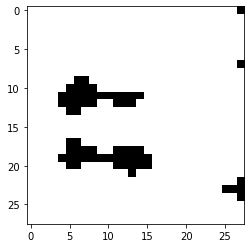

In [29]:
plt.imshow(X[0, :, :, 0], cmap='gray_r')
plt.show()